# 综合案例：电影数据分析

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 读取数据

movies = pd.read_csv('./day4资料/02-代码/IMDB/IMDB-Movie-Data.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息？

In [5]:
# 评分的平均分

movies['Rating'].mean()

np.float64(6.723199999999999)

In [8]:
# 导演的人数等信息

np.unique(movies['Director']).size # 用np.unique去掉重复导演

644

## 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？

<Axes: ylabel='Frequency'>

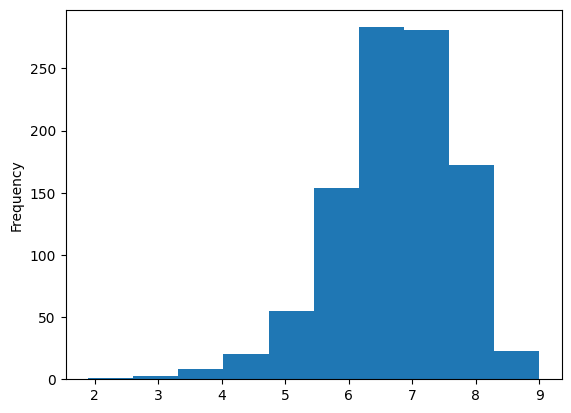

In [59]:
movies['Rating'].plot(kind='hist') # 用直方图更合适，但是pandas自带画图略显粗糙

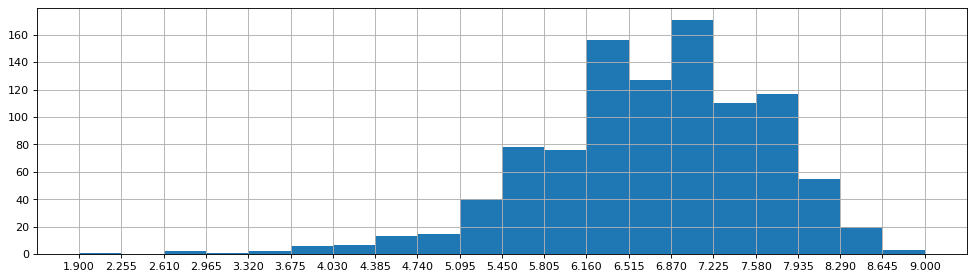

In [25]:
# 用matplotlib画图
# 1、创建画布
plt.figure(figsize=(15,4), dpi=80)

# 2、绘制直方图
plt.hist(movies['Rating'], 20)

# 修改刻度
plt.xticks(np.linspace(movies['Rating'].min(), movies['Rating'].max(), 21))

# 添加网格
plt.grid()

# 3、显示图像
plt.show()

## 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [30]:
# 先统计电影类别都有哪些

movie_genre = [i.split(',') for i in movies['Genre']] # 把每个电影的类别拆开成小列表
movie_genre # 得到嵌套很多小列表的大列表

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [34]:
[j for i in movie_genre for j in i] # 将每个小列表拆开汇入大列表

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [36]:
genre = np.unique([j for i in movie_genre for j in i]) # 去掉大列表中的重复元素
genre

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [37]:
len(genre)

20

In [38]:
# 统计每个类别有几个电影

movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [42]:
count = pd.DataFrame(np.zeros(shape=(movies['Title'].count(), len(genre)), dtype=int), columns=genre) # 创建空df
count.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
for i in range(1000):
    count.loc[i, movie_genre[i]] = 1 # 让每一个电影对应的类型位置变为1
count.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

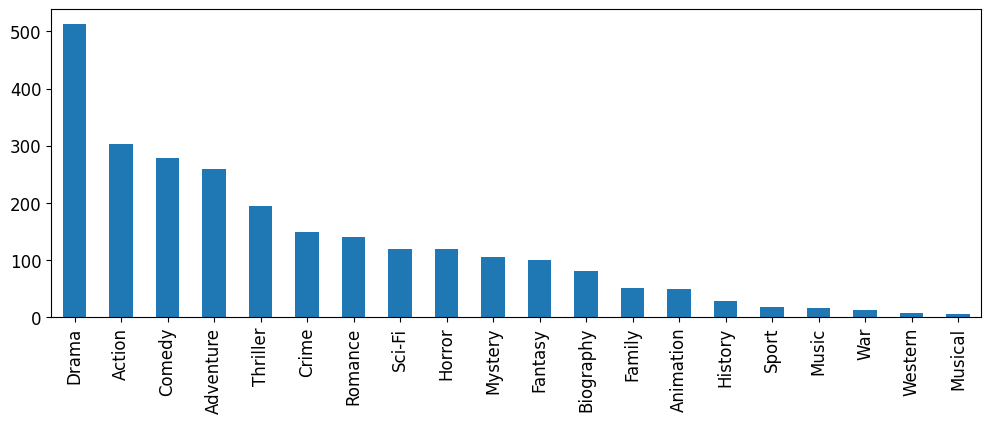

In [64]:
count.sum(axis=0).sort_values(ascending=False).plot(kind='bar', figsize=(12, 4), fontsize=12) # 统计总数、画图